<a href="https://colab.research.google.com/github/addo561/learning-pytorch/blob/main/neural_network_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
from torch import nn
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

###Binary Classification

In [2]:
#get data using circles dataset
n_samples = 1000

#get x and y
X,y = make_circles(n_samples=1000,
                   noise= 0.02,random_state=42)

In [3]:
X[:5],y[:5]#  x -> 2 features

(array([[ 0.76026594,  0.22387823],
        [-0.76722217,  0.1455425 ],
        [-0.80815854,  0.14894355],
        [-0.3760283 ,  0.70320906],
        [ 0.44051035, -0.89761737]]),
 array([1, 1, 1, 1, 0]))

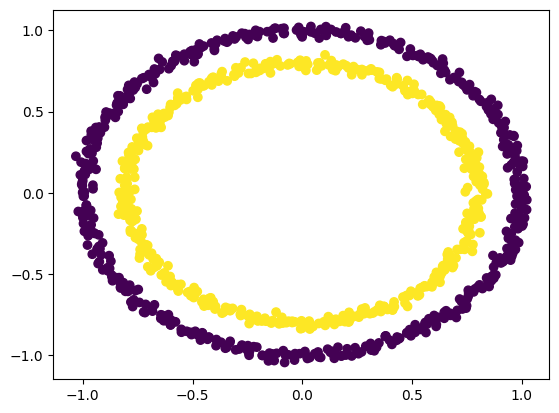

In [4]:
plt.scatter(x=X[:,0],y=X[:,1],c=y)
plt.show()

In [5]:
'''
check shape of x and y

'''
X.shape,y.shape

((1000, 2), (1000,))

In [6]:
#change x and y to tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

X[:5],y[:5]

(tensor([[ 0.7603,  0.2239],
         [-0.7672,  0.1455],
         [-0.8082,  0.1489],
         [-0.3760,  0.7032],
         [ 0.4405, -0.8976]]),
 tensor([1., 1., 1., 1., 0.]))

In [7]:
'''
split data into train and test sets
'''

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)
len(X_train), len(X_test), len(y_train), len(y_test)


(700, 300, 700, 300)

In [8]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [9]:
#accuracy function
def accuracy(y_true,y_pred):
  correct = torch.eq(y_true,y_pred).sum().item()
  acc = (correct/len(y_pred))*100
  return acc

In [10]:
"""
Building model ,adding relu activation since its a non-linear
model
"""
class binaryClassification(nn.Module):
  def __init__(self):
    super().__init__()
    self.layers = nn.Sequential(
        nn.Linear(in_features=2,out_features=10),
        nn.ReLU(),
        nn.Linear(in_features=10,out_features=10),
        nn.ReLU(),
        nn.Linear(in_features=10,out_features=1)

    )
  def forward(self,x):
    return self.layers(x)



In [11]:
model = binaryClassification()
model.to(device)

binaryClassification(
  (layers): Sequential(
    (0): Linear(in_features=2, out_features=10, bias=True)
    (1): ReLU()
    (2): Linear(in_features=10, out_features=10, bias=True)
    (3): ReLU()
    (4): Linear(in_features=10, out_features=1, bias=True)
  )
)

In [12]:
#use binarycrossentropy loss with sigmoid
loss_fn = nn.BCEWithLogitsLoss()

optimizer = torch.optim.Adam(params=model.parameters(),
                             lr=0.01)


In [16]:
##train model
torch.manual_seed(42)
torch.cuda.manual_seed(42)
epochs = 1000
X_train,X_test = X_train.to(device),X_test.to(device)
y_train,y_test = y_train.to(device),y_test.to(device)

for epoch in range(epochs):
  #train
  model.train()

  #forward
  y_logits = model(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  #loss
  loss = loss_fn(y_logits,y_train)
  acc = accuracy(y_pred=y_pred,y_true=y_train)

  #optimizer
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  #testing
  model.eval()
  with torch.inference_mode():
    test_logits = model(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    test_loss = loss_fn(test_logits,y_test)
    test_acc = accuracy(y_pred=test_pred,y_true=y_test)

  if epoch % 10 ==0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")




Epoch: 0 | Loss: 0.00009, Accuracy: 100.00% | Test loss: 0.00026, Test acc: 100.00%
Epoch: 10 | Loss: 0.00009, Accuracy: 100.00% | Test loss: 0.00025, Test acc: 100.00%
Epoch: 20 | Loss: 0.00009, Accuracy: 100.00% | Test loss: 0.00025, Test acc: 100.00%
Epoch: 30 | Loss: 0.00008, Accuracy: 100.00% | Test loss: 0.00025, Test acc: 100.00%
Epoch: 40 | Loss: 0.00008, Accuracy: 100.00% | Test loss: 0.00024, Test acc: 100.00%
Epoch: 50 | Loss: 0.00008, Accuracy: 100.00% | Test loss: 0.00024, Test acc: 100.00%
Epoch: 60 | Loss: 0.00008, Accuracy: 100.00% | Test loss: 0.00023, Test acc: 100.00%
Epoch: 70 | Loss: 0.00008, Accuracy: 100.00% | Test loss: 0.00023, Test acc: 100.00%
Epoch: 80 | Loss: 0.00008, Accuracy: 100.00% | Test loss: 0.00023, Test acc: 100.00%
Epoch: 90 | Loss: 0.00008, Accuracy: 100.00% | Test loss: 0.00022, Test acc: 100.00%
Epoch: 100 | Loss: 0.00007, Accuracy: 100.00% | Test loss: 0.00022, Test acc: 100.00%
Epoch: 110 | Loss: 0.00007, Accuracy: 100.00% | Test loss: 0.0002

In [15]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

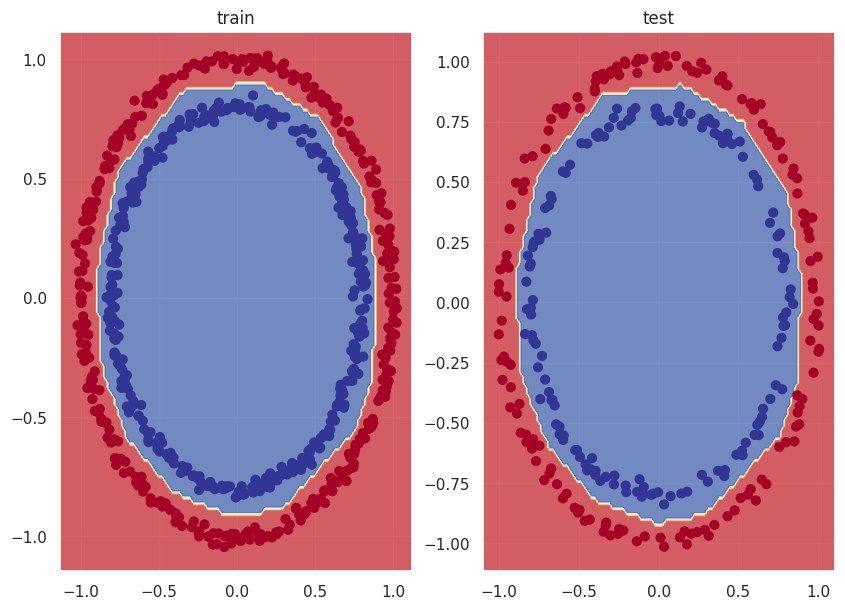

In [23]:
import seaborn as sns
sns.set()
plt.figure(figsize=(10,7))
plt.subplot(1,2,1)
plt.title('train')
plot_decision_boundary(model,X_train,y_train)
plt.subplot(1,2,2)
plt.title('test')
plot_decision_boundary(model,X_test,y_test)


In [20]:
model.state_dict()

OrderedDict([('layers.0.weight',
              tensor([[ 0.1202,  0.0828],
                      [-1.6651,  1.5073],
                      [-0.5202, -2.1730],
                      [-1.8325,  1.5223],
                      [-0.5091, -0.8694],
                      [-0.0601,  0.4108],
                      [ 1.3314, -1.8824],
                      [-2.2999, -1.7256],
                      [ 2.3031,  1.7966],
                      [ 2.0232, -1.2125]])),
             ('layers.0.bias',
              tensor([-0.3005, -0.2534, -0.2701, -1.1025,  2.5580, -0.5951, -1.0129, -0.8368,
                      -0.7680, -1.0858])),
             ('layers.2.weight',
              tensor([[-2.6428e-01, -2.4573e-01, -5.7243e-02,  5.8007e-02, -2.2312e-01,
                       -4.8223e-02,  4.3534e-02, -6.9988e-02,  2.3064e-02, -9.6362e-02],
                      [ 6.0085e-02,  1.1499e+00,  1.3063e+00,  1.5752e+00, -8.8524e-01,
                       -1.9968e-02,  1.2564e+00,  1.5636e+00,  1.6109e+00,  1.

###SAVE-MODEL

In [22]:
from pathlib import Path
modelpath = Path('model')
modelpath.mkdir(parents=True,exist_ok=True)

name = 'Binaryclassification.pth'
path = modelpath/name

torch.save(obj=model.state_dict(),f=path)
print(f'Saved to {path}')

Saved to model/Binaryclassification.pth
